In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt
import functions
import numpy as np

all_routes = set(functions.get_num_stops_of_route().keys())

ModuleNotFoundError: No module named 'functions'

In [4]:
filepath = "../../../data/"
routes = pd.read_csv(os.path.join(filepath, "mmt_gtfs", "routes", "all_routes.csv"))
trips = pd.read_csv(os.path.join(filepath, "mmt_gtfs", "trips.csv"))

In [5]:
def find_service(service_type=None):
    """
    find service types: WKD, SAT, SUN, HOL, MWK
    and returns a list of service types
    """
    if service_type == None:
        return list(set(trips["service_id"]))
    types = []
    for service in list(set(trips["service_id"])):
        if service.startswith("92"):
            if service_type.lower() in service.lower():
                types.append(service)

    return types

wkd = routes[routes["service_id"].isin(find_service("WKD"))]
sat = routes[routes["service_id"].isin(find_service("SAT"))]
sun = routes[routes["service_id"].isin(find_service("SUN"))]
hol = routes[routes["service_id"].isin(find_service("HOL"))]
mwk = routes[routes["service_id"].isin(find_service("MWK"))]

<ipython-input-6-f9f8dee820df>:49: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_inchesstr" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("available_routes_by_service.jpg", dpi=300, bbox_inchesstr="None")


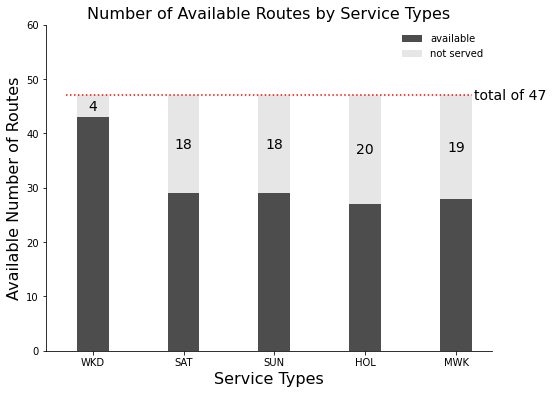

In [6]:
# bar plot 1: available routes
all_diff_wkd = all_routes.difference(set(wkd["route_num"]))
all_diff_sat = all_routes.difference(set(sat["route_num"]))
all_diff_sun = all_routes.difference(set(sun["route_num"]))
all_diff_hol = all_routes.difference(set(hol["route_num"]))
all_diff_mwk = all_routes.difference(set(mwk["route_num"]))

fig, ax = plt.subplots(figsize=(8, 6))
N = 5
diffs = (len(all_diff_wkd), len(all_diff_sat), len(all_diff_sun),
            len(all_diff_hol), len(all_diff_mwk))
all = (len(all_routes) - diffs[0],
       len(all_routes) - diffs[1],
       len(all_routes) - diffs[2],
       len(all_routes) - diffs[3],
       len(all_routes) - diffs[4])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# plt.bar(ind, diffs, width, bottom=diffs)
p1 = plt.bar(x=ind, height=all, width=width, color="0.3")
p2 = plt.bar(x=ind, height=diffs, width=width, bottom=all, color="0.9")
plt.plot((plt.xlim()[0] + 0.1, plt.xlim()[1] * 0.95),
         (len(all_routes), len(all_routes)),
         ":r")
plt.text(plt.xlim()[1] * 0.955, len(all_routes), "total of 47",
         ha="left", va="center", size=14)
plt.text(0, all[0] + diffs[0] / 2, str(len(all_diff_wkd)),
         size=14, ha="center", va="center")
plt.text(1, all[1] + diffs[1] / 2, str(len(all_diff_sat)),
         size=14, ha="center", va="center")
plt.text(2, all[2] + diffs[2] / 2, str(len(all_diff_sun)),
         size=14, ha="center", va="center")
plt.text(3, all[3] + diffs[3] / 2, str(len(all_diff_hol)),
         size=14, ha="center", va="center")
plt.text(4, all[4] + diffs[4] / 2, str(len(all_diff_mwk)),
         size=14, ha="center", va="center")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.ylabel('Available Number of Routes', size=16)
plt.xlabel('Service Types', size=16)
plt.title('Number of Available Routes by Service Types', size=16)
plt.xticks(ind, ('WKD', 'SAT', 'SUN', 'HOL', 'MWK'))
plt.yticks(np.arange(0, 70, 10))
plt.legend((p1[0], p2[0]), ('available', 'not served'), frameon=False)

# plt.savefig("available_routes_by_service.jpg", dpi=300, bbox_inchesstr="None")
plt.show()


# plt.rcParams["font.size"] = 10
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
#
# matrix_perc = get_overlap_matrix_to_perc()
# m = matrix_perc.to_numpy()
# fig = plt.figure(figsize=(14, 12))
# # img = plt.imshow(m, cmap = 'viridis', interpolation='nearest', vmax=threshold)
# img = plt.imshow(m, cmap=plt.cm.Blues, interpolation='nearest', vmax=threshold)
#
# plt.xticks(range(len(matrix_perc.index)), matrix_perc.index)
# plt.ylabel("Current Available Routes in Madison", fontsize=16)
# plt.yticks(range(len(matrix_perc.columns)), matrix_perc.columns)
# plt.title('Overlap Percentage of All Stops For Each Route', y=1.05, fontsize=16)
# plt.colorbar(img, label="Overlapping Percentage of Each Route")
#
# if savefig:
#     plt.savefig("../brainstorm_report" + filename, dpi=300, bbox_inches='tight')

In [7]:
# total = 2131 stops
# stops x weekdays = 1638 stops
# wkd = 4313 stops include duplicates

# travel time for all routes by headsign and by service type
# route 2
stop_times = pd.read_csv("../../../data/mmt_gtfs/stop_times.csv")
trips = pd.read_csv("../../../data/mmt_gtfs/trips.csv")

In [8]:
route_num = 2
list(set(trips[(trips["route_short_name"] == route_num)]["direction_id"]))

[0, 1]

In [9]:
# def to_trip_ids_route(route_num):
#     directions = list(set(trips[(trips["route_short_name"] == route_num)]["direction_id"]))
#     service_types = ["wkd", "sat", "sun"]
#     trip_ids = {}
#     for d in directions:
#         print("directions_id = ", d)
#         for s in service_types:
#             print("service_id = ", s)
#             trip = list(trips[(trips["route_short_name"] == route_num) &
#                        (trips["direction_id"] == d) &
#                        (trips["service_id"].isin(find_service(s)))]["trip_id"])
#             key = "d" + str(d) + "_" + s
#             trip_ids[key] = trip
#     return trip_ids

# for debugging
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

def find_service(service_type=None):
    """
    find service types: WKD, SAT, SUN, HOL, MWK
    and returns a list of service types
    """
    if service_type == None:
        return list(set(trips["service_id"]))
    types = []
    for service in list(set(trips["service_id"])):
        if service.startswith("92"):
            if service_type.lower() in service.lower():
                types.append(service)

    return types

# helper function of to_full_headsign function
def convert_headsigns_to_full(df):
    headsigns = {}  # trip_id: headsign fullname
    print(set(df["stop_headsign"]))
    for trip_id in list(set(df["trip_id"])):
        df2 = df[df["trip_id"] == trip_id]
        headsign = str(df2.iloc[0]["stop_headsign"])
        max_length = len(headsign)
        for idx, row in df2.iterrows():
            if row["stop_headsign"].lower() == "drop offs only".lower():
                continue
            if max_length < len(row["stop_headsign"]):
                max_length = len(row["stop_headsign"])
                headsign = row["stop_headsign"]
        headsigns[trip_id] = headsign
    print(set(headsigns.values()))
    return headsigns

# extra function of convert_headsigns to print out the number of headsigns of each headsign
def get_headsign_count(headsigns):
    headsign_names = set(headsigns.values())
    cnt = {name.lower(): 0 for name in list(headsign_names)}
    for id, hs in headsigns.items():
        cnt[hs.lower()] += 1
    return cnt

def to_trip_ids_by_directions_of_route(route_num, direction, service_type):
    """returns a list of trip ids filtered by given route_num, direction, service_type"""
    # test directions
    directions = list(set(trips[(trips["route_short_name"] == route_num)]["direction_id"]))
    if direction not in directions:
        return "direction not in list"
    # test service types
    service_types = ["wkd", "sat", "sun"]
    if service_type not in service_types:
        return "service type not in list"
    trip = list(trips[(trips["route_short_name"] == route_num) &
                      (trips["direction_id"] == direction) &
                      (trips["service_id"].isin(find_service(service_type.upper())))]["trip_id"])
    return trip

def trip_ids_join_stop_times(trip_ids):
    """returns a dataframe of stop_times filtered by trid_ids"""
    print(namestr(trip_ids, globals()))
    df = stop_times[(stop_times["trip_id"].isin(trip_ids))].copy()
    return df

# make the stop_headsign column cleaner
def add_full_headsign_to_df(headsigns, df):
    """Add cleaned headsigns to the given df"""
    # headsigns = convert_headsigns_to_full(df)
    # print(get_headsign_count(headsigns))
    full_headsign = []
    for i in range(len(df)):
        trip_id = df.iloc[i]["trip_id"]
        full_headsign.append(headsigns[trip_id])

    df["full_headsign"] = full_headsign
    return df

def main(route_num, direction, service_type):
    """
    route_num: route short name from the available routes
    direction: 0 or 1
    service_type: "wkd", "sat", "sun"
    :return a filtered dataframe
    """
    trip_ids = to_trip_ids_by_directions_of_route(route_num, direction, service_type)
    trip_x_stop_times = trip_ids_join_stop_times(trip_ids)
    headsigns = convert_headsigns_to_full(trip_x_stop_times)
    return get_headsign_count(headsigns), add_full_headsign_to_df(headsigns, trip_x_stop_times)

# main(2, 0, "wkd")
h1,d0_wkd = main(2, 0, "wkd")
h2,d0_sat = main(2, 0, "sat")
h3,d0_sun = main(2, 0, "sun")
h4,d1_wkd = main(2, 1, "wkd")
h5,d1_sat = main(2, 1, "sat")
h6,d1_sun = main(2, 1, "sun")

[]
{'NORTH TRANSFER: VIA FORDEM', 'DROP OFFS ONLY', 'NORTH TRANSFER', 'NORTH TRANSFER: VIA SHERMAN', 'CAPITOL SQUARE'}
{'NORTH TRANSFER: VIA FORDEM', 'NORTH TRANSFER: VIA SHERMAN', 'CAPITOL SQUARE'}
[]
{'NORTH TRANSFER: VIA FORDEM', 'DROP OFFS ONLY', 'NORTH TRANSFER', 'NORTH TRANSFER: VIA SHERMAN', 'CAPITOL SQUARE'}
{'NORTH TRANSFER: VIA FORDEM', 'NORTH TRANSFER: VIA SHERMAN', 'CAPITOL SQUARE'}
[]
{'NORTH TRANSFER: VIA FORDEM', 'DROP OFFS ONLY', 'NORTH TRANSFER', 'NORTH TRANSFER: VIA SHERMAN', 'CAPITOL SQUARE'}
{'NORTH TRANSFER: VIA FORDEM', 'NORTH TRANSFER: VIA SHERMAN', 'CAPITOL SQUARE'}
[]
{'WEST TRANSFER: VIA FORDEM', 'DROP OFFS ONLY', 'WEST TRANSFER', 'WEST TRANSFER: VIA SHERMAN'}
{'WEST TRANSFER: VIA FORDEM', 'WEST TRANSFER: VIA SHERMAN'}
[]
{'WEST TRANSFER: VIA FORDEM', 'DROP OFFS ONLY', 'WEST TRANSFER', 'WEST TRANSFER: VIA SHERMAN'}
{'WEST TRANSFER: VIA FORDEM', 'WEST TRANSFER: VIA SHERMAN'}
[]
{'WEST TRANSFER: VIA FORDEM', 'DROP OFFS ONLY', 'WEST TRANSFER', 'WEST TRANSFER: VIA

In [10]:

stops = pd.read_csv("../../../data/mmt_gtfs/stops.csv")
wkd_ridership = pd.read_csv("../../../data/ridership/by_stop_and_route/weekday.csv")
sat_ridership = pd.read_csv("../../../data/ridership/by_stop_and_route/saturday.csv")
sun_ridership = pd.read_csv("../../../data/ridership/by_stop_and_route/sunday.csv")

In [11]:
fordem = d0_wkd[d0_wkd["full_headsign"] == 'NORTH TRANSFER: VIA FORDEM']
sherman = d0_wkd[d0_wkd["full_headsign"] == 'NORTH TRANSFER: VIA SHERMAN']
cs = d0_wkd[d0_wkd["full_headsign"] == 'CAPITOL SQUARE']

fordem_stops = stops[stops["stop_id"].isin(list(fordem["stop_id"]))][["stop_id", "stop_lat", "stop_lon"]]
fordem_ridership = wkd_ridership[wkd_ridership["Route"] == 2][["StopID", "DailyBoard"]]
fordem = fordem.join(fordem_stops.set_index("stop_id"), on="stop_id")
fordem = fordem.join(fordem_ridership.set_index("StopID"), on="stop_id")
fordem

sherman_stops = stops[stops["stop_id"].isin(list(sherman["stop_id"]))][["stop_id", "stop_lat", "stop_lon"]]
sherman_ridership = wkd_ridership[wkd_ridership["Route"] == 2][["StopID", "DailyBoard"]]
sherman = sherman.join(sherman_stops.set_index("stop_id"), on="stop_id")
sherman = sherman.join(sherman_ridership.set_index("StopID"), on="stop_id")

cs_stops = stops[stops["stop_id"].isin(list(cs["stop_id"]))][["stop_id", "stop_lat", "stop_lon"]]
cs_ridership = wkd_ridership[wkd_ridership["Route"] == 2][["StopID", "DailyBoard"]]
cs = cs.join(cs_stops.set_index("stop_id"), on="stop_id")
cs = cs.join(cs_ridership.set_index("StopID"), on="stop_id")

cs

,trip_id,stop_sequence,stop_id,pickup_type,drop_off_type,arrival_time,departure_time,timepoint,stop_headsign,shape_dist_traveled,full_headsign,stop_lat,stop_lon,DailyBoard
2015,1007500,1,6100,0,1,23:00:00,23:00:00,1,CAPITOL SQUARE,0.0097,CAPITOL SQUARE,43.053883,-89.475098,199.04
2016,1007500,2,2925,0,0,23:00:52,23:00:52,0,CAPITOL SQUARE,0.3175,CAPITOL SQUARE,43.056418,-89.472755,7.45
2017,1007500,3,2401,0,0,23:01:50,23:01:50,0,CAPITOL SQUARE,0.6611,CAPITOL SQUARE,43.061234,-89.471956,10.57
2018,1007500,4,2249,0,0,23:02:26,23:02:26,0,CAPITOL SQUARE,0.8757,CAPITOL SQUARE,43.064090,-89.471242,6.79
2019,1007500,5,2669,0,0,23:02:56,23:02:56,0,CAPITOL SQUARE,1.0579,CAPITOL SQUARE,43.066034,-89.468873,2.23
2020,1007500,6,2201,0,0,23:03:23,23:03:23,0,CAPITOL SQUARE,1.2175,CAPITOL SQUARE,43.067897,-89.467949,18.80
2021,1007500,7,2121,0,0,23:04:09,23:04:09,0,CAPITOL SQUARE,1.4903,CAPITOL SQUARE,43.069331,-89.463074,23.03
2022,1007500,8,2175,0,0,23:05:00,23:05:00,1,CAPITOL SQUARE,1.7755,CAPITOL SQUARE,43.072912,-89.463496,82.33
2023,1007500,9,2101,0,0,23:05:43,23:05:43,0,CAPITOL SQUARE,1.9756,CAPITOL SQUARE,43.072707,-89.459545,57.63
2024,1007500,10,2395,0,0,23:06:11,23:06:11,0,CAPITOL SQUARE,2.1058,CAPITOL SQUARE,43.072904,-89.456953,32.27


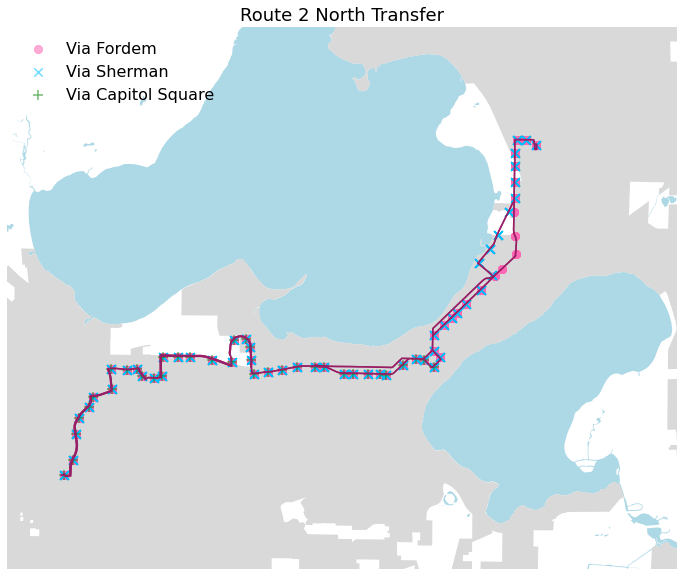

In [12]:
_, ax = plt.subplots(figsize=(12, 12))
functions.plot_background(ax)
s1 = fordem.plot.scatter(ax=ax, x="stop_lon", y="stop_lat", s=70, c="hotpink", marker="8", label="Via Fordem", alpha=0.55)
s2 = sherman.plot.scatter(ax=ax, x="stop_lon", y="stop_lat", s=70, c="deepskyblue", marker="x", label="Via Sherman", alpha=0.55)
s3 = cs.plot.scatter(ax=ax, x="stop_lon", y="stop_lat", s=85, c="green", marker="+", label="Via Capitol Square", alpha=0.55)
ax.margins(x=-0.25, y=-0.25)
functions.plot_route(ax, 2)

ax.legend(loc="upper left", frameon=False, fontsize=16)
ax.set_title("Route 2 North Transfer", fontsize=18)
ax.set_axis_off()
# plt.savefig("route2_north_transfer.png", dpi=300, bbox_inches="tight")

In [13]:
fordem = d1_wkd[d1_wkd["full_headsign"] == 'WEST TRANSFER: VIA FORDEM']
sherman = d1_wkd[d1_wkd["full_headsign"] == 'WEST TRANSFER: VIA SHERMAN']
cs = d1_wkd[d1_wkd["full_headsign"] == 'CAPITOL SQUARE']

fordem_stops = stops[stops["stop_id"].isin(list(fordem["stop_id"]))][["stop_id", "stop_lat", "stop_lon"]]
fordem_ridership = wkd_ridership[wkd_ridership["Route"] == 2][["StopID", "DailyBoard"]]
fordem = fordem.join(fordem_stops.set_index("stop_id"), on="stop_id")
fordem = fordem.join(fordem_ridership.set_index("StopID"), on="stop_id")
fordem

sherman_stops = stops[stops["stop_id"].isin(list(sherman["stop_id"]))][["stop_id", "stop_lat", "stop_lon"]]
sherman_ridership = wkd_ridership[wkd_ridership["Route"] == 2][["StopID", "DailyBoard"]]
sherman = sherman.join(sherman_stops.set_index("stop_id"), on="stop_id")
sherman = sherman.join(sherman_ridership.set_index("StopID"), on="stop_id")

cs_stops = stops[stops["stop_id"].isin(list(cs["stop_id"]))][["stop_id", "stop_lat", "stop_lon"]]
cs_ridership = wkd_ridership[wkd_ridership["Route"] == 2][["StopID", "DailyBoard"]]
cs = cs.join(cs_stops.set_index("stop_id"), on="stop_id")
cs = cs.join(cs_ridership.set_index("StopID"), on="stop_id")

cs

,trip_id,stop_sequence,stop_id,pickup_type,drop_off_type,arrival_time,departure_time,timepoint,stop_headsign,shape_dist_traveled,full_headsign,stop_lat,stop_lon,DailyBoard


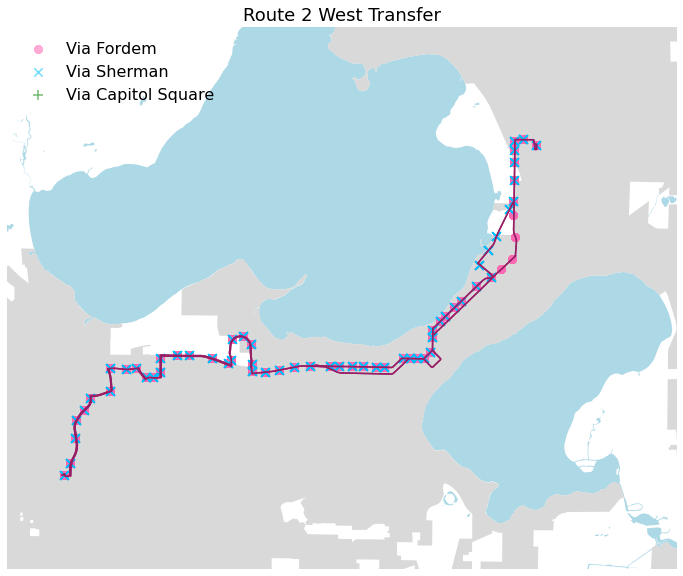

In [14]:
_, ax = plt.subplots(figsize=(12, 12))
functions.plot_background(ax)
s1 = fordem.plot.scatter(ax=ax, x="stop_lon", y="stop_lat", s=70, c="hotpink", marker="8", label="Via Fordem", alpha=0.55)
s2 = sherman.plot.scatter(ax=ax, x="stop_lon", y="stop_lat", s=70, c="deepskyblue", marker="x", label="Via Sherman", alpha=0.55)
s3 = cs.plot.scatter(ax=ax, x="stop_lon", y="stop_lat", s=85, c="green", marker="+", label="Via Capitol Square", alpha=0.55)
ax.margins(x=-0.25, y=-0.25)
functions.plot_route(ax, 2)

ax.legend(loc="upper left", frameon=False, fontsize=16)
ax.set_title("Route 2 West Transfer", fontsize=18)
ax.set_axis_off()
# plt.savefig("route2_west_transfer.png", dpi=300, bbox_inches="tight")




In [15]:
# look at overlap

In [16]:
# look at number of boarding

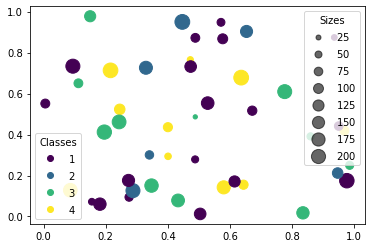

In [17]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots()

scatter = ax.scatter(x, y, c=c, s=s)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()